In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Test B-Splines theory

In [2]:
def spline_basis(u, i, k, t_nodes):
    if k == 1:
        # Spline of degree 0:
        if t_nodes[i] <= u and u < t_nodes[i+1]:
            return 1
        
        else:
            return 0
        
    else:
        num_1 = u - t_nodes[i]
        den_1 = t_nodes[i+k-1] - t_nodes[i]
                        
        num_2 = t_nodes[i+k] - u
        den_2 = t_nodes[i+k] - t_nodes[i+1]

        if den_1 < 1e-8:
            coef_1 = 0
        else:
            coef_1 = num_1/den_1
                        
        if den_2 < 1e-8:
            coef_2 = 0
        else:
            coef_2 = num_2/den_2

        return coef_1 * spline_basis(u, i, k-1, t_nodes) + coef_2 * spline_basis(u, i+1, k-1, t_nodes)
    

In [5]:
def b_spline_fit(P, k, n_points=100):
    n, d = P.shape
    m = k + n + 1
    t_knots = np.array([0.]*k + list(range(1,n-k+1)) + [n-k+1]*k)/float(n-k+1)
    
    x = np.linspace(0., 1.-1e-12, n_points)
    C_bspline = np.zeros([n_points, d])
    
    for i, x_i in enumerate(x):
        C_bspline[i,:] = np.dot(P.transpose(), [spline_basis(x_i, j, k, t_knots) for j in range(n)])
        
    return C_bspline

# The B-Spline application

bspline shape:  (100, 2)


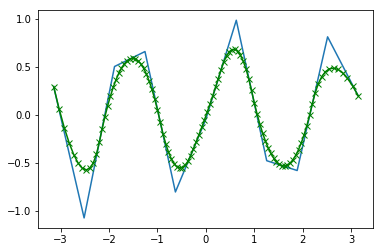

In [24]:
x = np.linspace(-math.pi, math.pi, 11)

y = np.sin(3.*x) + np.random.normal(0, 0.15, x.size)

P = np.column_stack((x, y))

plt.plot(x, y)
bspline_fitting = b_spline_fit(P, 3, n_points=100)
print('bspline shape: ', bspline_fitting.shape)
plt.plot(bspline_fitting[:,0], bspline_fitting[:,1], 'g-x')


plt.show()